In [1]:
import numpy as np
import matplotlib.pyplot as plt

#**7.1. Simulating SDEs**

In [2]:
def brownian(interval, step):
  n = int(interval / step)
  B = [0]
  for i in range(n):
    B.append(np.sqrt(step) * np.random.standard_normal() + B[-1])
  return B

##Euler-Maruyama scheme

In [3]:
def SDE1(sigma, mu, x0):
  x = np.linspace(0.0, 1.0, 101)
  for i in range(100):
    B = brownian(1, 0.01)
    S = [x0]
    for j in range(100):
      St = sigma(S[j]) * (B[j+1] - B[j]) + mu(S[j]) * 0.01 + S[j]
      S.append(St)
    plt.plot(x, S)

###Geometric Brownian Motion

####mu= -1/2

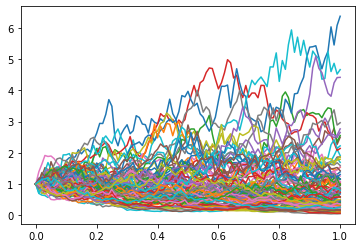

In [4]:
sigma = lambda x : x
mu = lambda x : (-0.5 + 0.5) * x
SDE1(sigma, mu, 1)

####mu= -2

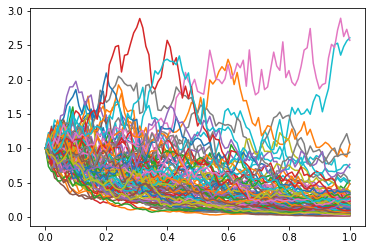

In [5]:
sigma = lambda x : x
mu = lambda x : (-2 + 0.5) * x
SDE1(sigma, mu, 1)

####mu= 0

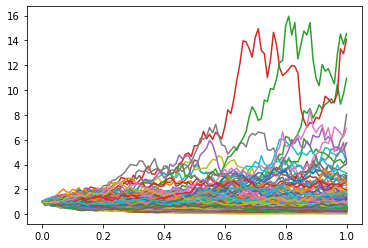

In [6]:
sigma = lambda x : x
mu = lambda x : (0 + 0.5) * x
SDE1(sigma, mu, 1)

###Ornstein-Uhlenbeck process

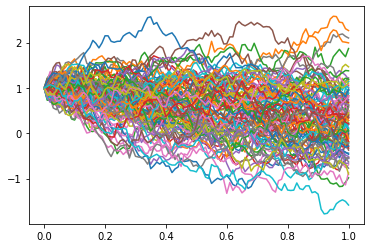

In [7]:
sigma = lambda x : 1
mu = lambda x : -x
SDE1(sigma, mu, 1)

###The diffusion of Example 7.22

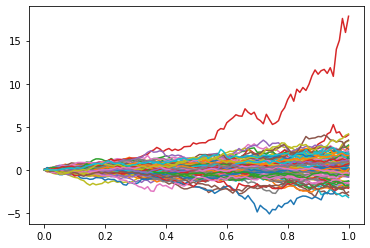

In [8]:
sigma = lambda x : np.sqrt(1 + x**2)
mu = lambda x : np.sin(x)
SDE1(sigma, mu, 0)

##Milstein scheme

In [9]:
def SDE2(sigma, sigma_d, mu, x0):
  x = np.linspace(0.0, 1.0, 101)
  for i in range(100):
    B = brownian(1, 0.01)
    S = [x0]
    for j in range(100):
      St = sigma(S[j]) * (B[j+1] - B[j]) + mu(S[j]) * 0.01 + sigma_d(S[j]) * sigma(S[j]) * 0.5 * ((B[j+1]-B[j])**2 - 0.01) + S[j]
      S.append(St)
    plt.plot(x, S)

###Geometric Brownian Motion

####mu= -1/2

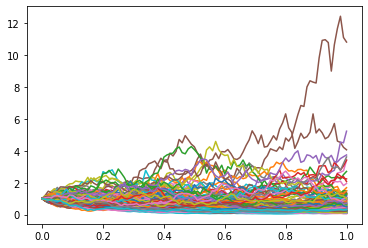

In [10]:
sigma = lambda x : x
sigma_d = lambda x : 1
mu = lambda x : (-0.5 + 0.5) * x
SDE2(sigma, sigma_d, mu, 1)

####mu= -2

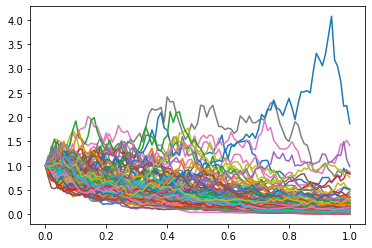

In [11]:
sigma = lambda x : x
sigma_d = lambda x : 1
mu = lambda x : (-2 + 0.5) * x
SDE2(sigma, sigma_d, mu, 1)

####mu= 0

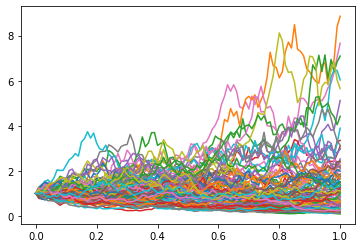

In [12]:
sigma = lambda x : x
sigma_d = lambda x : 1
mu = lambda x : (0 + 0.5) * x
SDE2(sigma, sigma_d, mu, 1)

###Ornstein-Uhlenbeck process

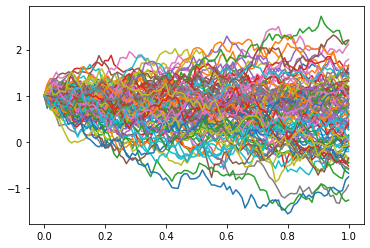

In [13]:
sigma = lambda x : 1
sigma_d = lambda x : 0
mu = lambda x : -x
SDE2(sigma, sigma_d, mu, 1)

###The diffusion of Example 7.22

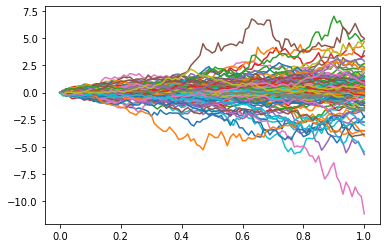

In [14]:
sigma = lambda x : np.sqrt(1 + x**2)
sigma_d = lambda x : x / np.sqrt(1 + x**2)
mu = lambda x : np.sin(x)
SDE2(sigma, sigma_d, mu, 0)

#**7.2. Euler vs Milstein**

In [61]:
def abs_error1(n):
  x = np.linspace(0.0, 1.0, 1+n)
  sigma = lambda x : x
  mu = lambda x : 0.5*x
  E = 0
  for i in range(100):
    B = brownian(1, 1/n)
    S = np.exp(B - x/2)
    Sn = [1]
    for j in range(n):
      St = sigma(Sn[j]) * (B[j+1] - B[j]) + mu(Sn[j])/n + Sn[j]
      Sn.append(St)
    E += np.abs(S[-1] - Sn[-1])
  return E/100

[0.6903391880640006, 0.7330058821570072, 0.5106714707481885, 0.5934756928443659]


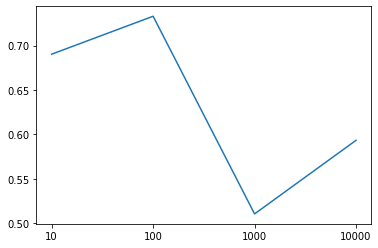

In [65]:
np.random.seed(30)
error1= []
for n in [10, 100, 1000, 10000] :
  error1.append(abs_error1(n))
print(error1)
plt.plot(['10','100','1000','10000'],error1)

In [66]:
def abs_error2(n):
  x = np.linspace(0.0, 1.0, 1+n)
  sigma = lambda x : x
  mu = lambda x : 0.5*x
  sigma_d = lambda x : 1
  E = 0
  for i in range(100):
    B = brownian(1, 1/n)
    S = np.exp(B - x/2)
    Sn = [1]
    for j in range(n):
      St = sigma(Sn[j]) * (B[j+1] - B[j]) + mu(Sn[j]) / n + sigma_d(Sn[j]) * sigma(Sn[j]) * 0.5 * ((B[j+1]-B[j])**2 - 1/n) + Sn[j]
      Sn.append(St)
    E += np.abs(S[-1] - Sn[-1])
  return E/100

[0.6177026510748088, 0.7381271644407559, 0.5042636438362461, 0.5962655602635927]


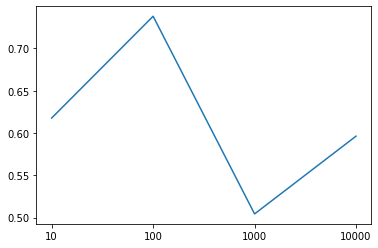

In [67]:
np.random.seed(30)
error2= []
for n in [10, 100, 1000, 10000] :
  error2.append(abs_error2(n))
print(error2)
plt.plot(['10','100','1000','10000'],error2)

#**7.3. The CIR model**

a = 0.1

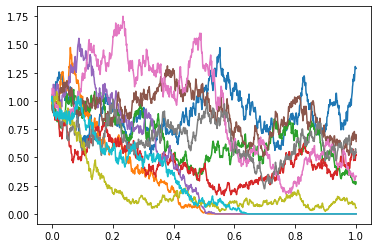

In [92]:
x0 = 1
mu = lambda x : 0.1-x
sigma = lambda x : np.sqrt(x)
x = np.linspace(0.0, 1.0, 1001)
for i in range(10):
  B = brownian(1, 0.001)
  S = np.zeros((1001),)
  S[0] = x0
  for j in range(1000):
    St = sigma(S[j]) * (B[j+1] - B[j]) + mu(S[j]) * 0.001 + S[j]
    if St<0 :
      break
    else: S[j+1] = St
  plt.plot(x, S)

a = 0.25

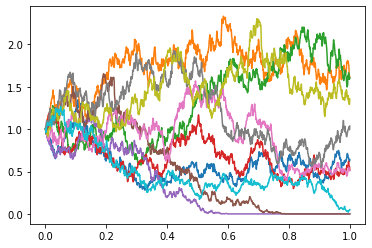

In [93]:
x0 = 1
mu = lambda x : 0.25-x
sigma = lambda x : np.sqrt(x)
x = np.linspace(0.0, 1.0, 1001)
for i in range(10):
  B = brownian(1, 0.001)
  S = np.zeros((1001),)
  S[0] = x0
  for j in range(1000):
    St = sigma(S[j]) * (B[j+1] - B[j]) + mu(S[j]) * 0.001 + S[j]
    if St<0 :
      break
    else: S[j+1] = St
  plt.plot(x, S)

a = 10

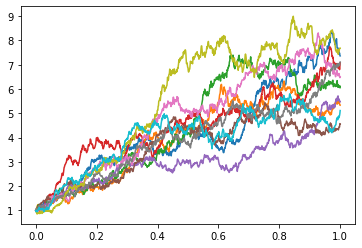

In [99]:
x0 = 1
mu = lambda x : 10-x
sigma = lambda x : np.sqrt(x)
x = np.linspace(0.0, 1.0, 1001)
for i in range(10):
  B = brownian(1, 0.001)
  S = np.zeros((1001),)
  S[0] = x0
  for j in range(1000):
    St = sigma(S[j]) * (B[j+1] - B[j]) + mu(S[j]) * 0.001 + S[j]
    if St<0 :
      break
    else: S[j+1] = St
  plt.plot(x, S)

In [100]:
for a in [0.1, 0.25, 10]:
  P = 0
  x0 = 1
  mu = lambda x : a-x
  sigma = lambda x : np.sqrt(x)
  x = np.linspace(0.0, 1.0, 1001)
  for i in range(1000):
    B = brownian(1, 0.001)
    S = np.zeros((1001),)
    S[0] = x0
    for j in range(1000):
      St = sigma(S[j]) * (B[j+1] - B[j]) + mu(S[j]) * 0.001 + S[j]
      if St<0 :
        break
      else: S[j+1] = St
    if 1 in (list(S<=0 + 0)):
      P += 1
  print(P/1000)

0.238
0.135
0.0


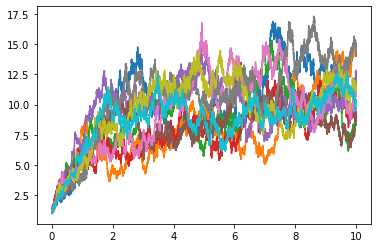

In [102]:
x0 = 1
mu = lambda x : 10-x
sigma = lambda x : np.sqrt(x)
x = np.linspace(0.0, 10.0, 10001)
for i in range(10):
  B = brownian(10, 0.001)
  S = np.zeros((10001),)
  S[0] = x0
  for j in range(10000):
    St = sigma(S[j]) * (B[j+1] - B[j]) + mu(S[j]) * 0.001 + S[j]
    if St<0 :
      break
    else: S[j+1] = St
  plt.plot(x, S)

In [103]:
Z = 0
x0 = 1
mu = lambda x : 10-x
sigma = lambda x : np.sqrt(x)
x = np.linspace(0.0, 10.0, 10001)
for i in range(100):
  B = brownian(10, 0.001)
  S = np.zeros((10001),)
  S[0] = x0
  for j in range(10000):
    St = sigma(S[j]) * (B[j+1] - B[j]) + mu(S[j]) * 0.001 + S[j]
    if St<0 :
      break
    else: S[j+1] = St
  Z += S[-1]
print(Z/100)

9.70199411302308


The average is close to the value of a.

#**7.4. Bessel process**

d = 2

0.04


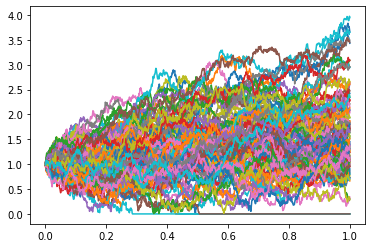

In [110]:
x0 = 1
P = 0
mu = lambda x : 1/(2*x)
sigma = lambda x : 1
x = np.linspace(0.0, 1.0, 1001)
for i in range(100):
  B = brownian(1, 0.001)
  S = np.zeros((1001),)
  S[0] = x0
  for j in range(1000):
    St = sigma(S[j]) * (B[j+1] - B[j]) + mu(S[j]) * 0.001 + S[j]
    if St<0 :
      P += 1
      break
    else: S[j+1] = St
  plt.plot(x, S)
print(P/100)

a = 3

0.0


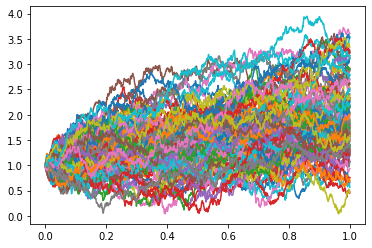

In [111]:
x0 = 1
P = 0
mu = lambda x : 2/(2*x)
sigma = lambda x : 1
x = np.linspace(0.0, 1.0, 1001)
for i in range(100):
  B = brownian(1, 0.001)
  S = np.zeros((1001),)
  S[0] = x0
  for j in range(1000):
    St = sigma(S[j]) * (B[j+1] - B[j]) + mu(S[j]) * 0.001 + S[j]
    if St<0 :
      P += 1
      break
    else: S[j+1] = St
  plt.plot(x, S)
print(P/100)

a = 10

0.0


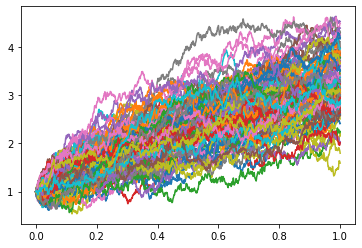

In [112]:
x0 = 1
P = 0
mu = lambda x : 9/(2*x)
sigma = lambda x : 1
x = np.linspace(0.0, 1.0, 1001)
for i in range(100):
  B = brownian(1, 0.001)
  S = np.zeros((1001),)
  S[0] = x0
  for j in range(1000):
    St = sigma(S[j]) * (B[j+1] - B[j]) + mu(S[j]) * 0.001 + S[j]
    if St<0 :
      P += 1
      break
    else: S[j+1] = St
  plt.plot(x, S)
print(P/100)

#**7.5. Explosion time**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


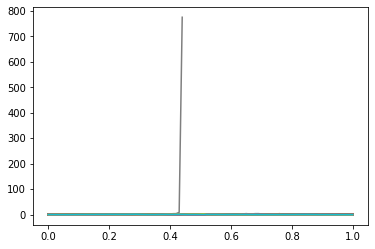

In [121]:
x0 = 0
mu = lambda x : 0
sigma = lambda x : np.exp(x)
x = np.linspace(0.0, 1.0, 101)
for i in range(100):
  B = brownian(1, 0.01)
  S = np.zeros((101),)
  S[0] = x0
  for j in range(100):
    St = sigma(S[j]) * (B[j+1] - B[j]) + mu(S[j]) * 0.01 + S[j]
    S[j+1] = St
  plt.plot(x, S)

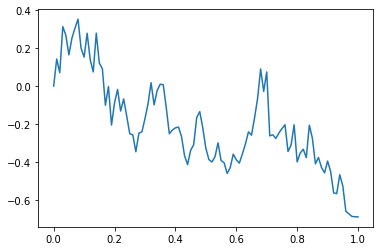

In [123]:
x0 = 0
mu = lambda x : 0
sigma = lambda x : np.exp(x)
x = np.linspace(0.0, 1.0, 101)
for i in range(1):
  B = brownian(1, 0.01)
  S = np.zeros((101),)
  S[0] = x0
  for j in range(100):
    St = sigma(S[j]) * (B[j+1] - B[j]) + mu(S[j]) * 0.01 + S[j]
    S[j+1] = St
  plt.plot(x, S)

#**7.6. A martingale**

In [126]:
def integral(X, B):
  I = [0]
  for i in range(len(X)-1):
    I.append(I[i] + X[i] * (B[i+1] - B[i]))
  return np.array(I)

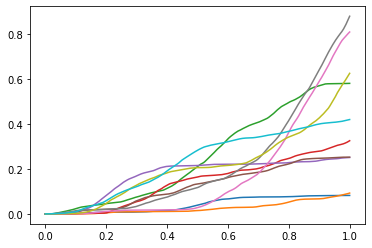

In [133]:
x = np.linspace(0.0, 1.0, 1001)
for i in range(10):
  B = np.array(brownian(1, 0.001))
  Q = integral(B**2, x)
  plt.plot(x, Q)

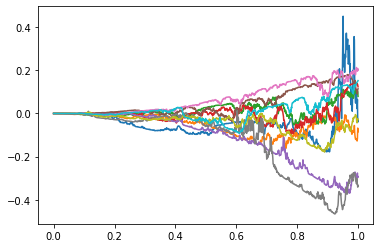

In [161]:
x = np.linspace(0.0, 1.0, 1001)
for i in range(10):
  B = np.array(brownian(1, 0.001))
  Q = integral(B**2, x)
  X = integral(B, B)
  M = X**2 - Q
  plt.plot(x, M)